### My imports

In [1]:
import math

### Functions I will use across multiple problems

In [2]:
def get_activity(grams, mol_mass, abundance, half_life):
    # N_atoms = grams * mol/g * atoms/mol
    n_atoms = grams/mol_mass * N_A
    n_active = n_atoms * abundance
    # the default math.log() is the natural log - other bases require additional arguments
    decays_year = n_active * math.log(2)/half_life
    activity = decays_year/(365*24*60*60)
    return activity

# Homework 1: radiation and programming basics

30pts total: 26pts from the problesm below and 4pts from class work participation (lecture and lab)

# Notes:
* Please complete all numerical calculations using python in your notebook. Do not simply use a calculator and insert your answers.
* Please provide context for numerical answers, just as a print statement specifying what calculation a given result relates to.
* Please use Markdown for any test-based answers. (I will go over this at the start of class on Tuesday)
* Please insert your in-class work at the start of your notebook, before answering these homework questions, or submit that work as a separate notebook.

# 1. Estimating the radioactivity from humans. (10pts)

### 1.a. Assume an average human mass of 70kg. What is the activity (Bq) of that person? (5pts)
  * Hints:
    * What elements(isotopes) in our body produce radiation that actually escapes our body? (Ignore trace elements)
    * How much of our body is made up of those elements?
      * Don’t forget to consider the natural abundance of the unstable isotopes
    * How much activity will that produce?
      * Don’t forget about branching ratios

### Problem 1:
The isotopes that actually escape our body means those producing gamma radiation, as beta (or alpha) radiation will be absorbed within our body. Surface emission (from our skin) of betas could, in principle, contribute to the radiation we emit that leaves our body, but I did not intend for you to try to determine the fraction of isotopes in our body that our in the outer layer of our skin.

There are to main elements that have radioactive isotopes that are found in significant quantity in our body, carbon and potassium. However, carbon is only a beta emitter, so does not pass the above restriction. This means we only need to consider K-40 as a source of radiation from humans that will leave our body.


In [3]:
k40_abundance = 0.000117
K_half = 1.251e9
human_k = 0.004
gamma_branch = 0.1066
# molecular mass of K
k_mass = 39.098
# Avogadro's number
N_A = 6.02e23

In [4]:
human_mass = 70000 # assume average human is 70kg
grams_k = human_mass * human_k
total_activity = get_activity(grams_k, k_mass, k40_abundance, K_half)
gamma_activity = total_activity * gamma_branch
print("Activity outside the body from 70kg human = {} Bq".format(gamma_activity))

Activity outside the body from 70kg human = 944.723222887241 Bq


### 1.b. What is the specific activity for a human? (2pts)

In [8]:
specific_activity = gamma_activity/human_mass
print("The specific activity for a human (from K-40) = {}".format(specific_activity))

The specific activity for a human (from K-40) = 0.013496046041246301


### 1.c. How radioactive are you? (2pts)
  * Hint: you shouldn't need to recalculate activity, instead make use of specific activity
  * You don’t have to use your actual mass

In [7]:
my_mass = 60000
my_activity = specific_activity * my_mass
print(specific_activity)
print("Activity from me (assuming I am 60kg) = {} Bq".format(my_activity))

0.013496046041246301
Activity from me (assuming I am 60kg) = 809.762762474778 Bq


### 1.d. Provide references (1pt) 
  * Where did you get the relevant numers that went in to your calculations?
  * Include your references in Markdown
  * ***NOTE about grading: this is only one point, but if you didn't provide these and got wrong answers above because of references we could not verify, points will be deducted in those parts***

My sources for the important quantities are:
* K-40 abundance is 0.012% (from https://en.wikipedia.org/wiki/Potassium-40)
* K-40 half-life (in years) (from https://en.wikipedia.org/wiki/Potassium-40)
* Potassium in human body: ~0.4% (from https://en.wikipedia.org/wiki/Composition_of_the_human_body)
* 10.66% of K-40 decays through gamma emission (Branching ratio from lecture)


# 2. Determining the activity from a 120g (medium size) banana. (8pts)

### Use the listed molecular components of bananas for the following steps:
* Neglect the impact of the banana peel in your answers - assume a uniform composition and assume you will injest the entire banana.
* Relevant composition of bananas:
  * Potassium (K)
  * Vitamin B6 (C<sub>8</sub>H<sub>11</sub>NO<sub>3</sub>)
  * Vitamin C (C<sub>6</sub>H<sub>8</sub>O<sub>6</sub>)
  * Isoamyl acetate (C<sub>7</sub>H<sub>14</sub>O<sub>2</sub>)
  * Pectin (C<sub>6</sub>H<sub>10</sub>O<sub>7</sub>)
* Check [nutrition information](https://en.wikipedia.org/wiki/Banana#Nutrition)

### 2.a. Which of the above components of the banana composition will contribute significantly to your answer and why? (2pts)

* from nutrition information here: https://en.wikipedia.org/wiki/Banana#Nutrition
  * Potassium in 100g of banana = 358 mg
  * Vitamin B: 0.4 mg
  * Vitamin C: 8.7 mg
  * the rest will be ignored
* other numbers from same references as problem 1

Potassium and Carbon both have radioactive isotopes (K-40 and C-14) so they could contribute. However, from these numbers, there is ~100x more Potassium than Carbon in a banana. Also, the natural abundance of carbon-14 is 1 in a trillion vs for K-40, which is ~.12%. So we will not consider radiation from carbon in this calculation.

NOTE: If you thought to consider the contribution to the carbon in a banana from sugar, my above argument does not hold and you would have determined that radiation from C-14 is significant. You will get bonus credit.

### 2.b. What is the total activity of the banana? (2pts)

In [14]:
# convert from 100g to 120g (the banana weight I specified)
grams_k_banana = 120/100 * .358

# We can now get the activity by imputing this mass and all the same numbers as problem 1
banana_activity = get_activity(grams_k_banana, k_mass, k40_abundance, K_half)
print("The total activity for the banana (assuming only K-40 contributes) is", banana_activity)

The total activity for the banana (assuming only K-40 contributes) is 13.597329688835396


### 2.c. What is the activity just from gamma radiation? (2pts)
* Hint: look at branching ratios for most significant isotopes

In [11]:
banana_activity_gamma = banana_activity * gamma_branch
print("The activity from gamma radiation = {} Bq".format(banana_activity_gamma))

The activity from gamma radiation = 1.4494753448298532 Bq


Note: This will not change if you did include sugar, because C-14 does not produce gamma radiation.

### 2.d. Assuming no self-shielding of electrons (all electrons produced escape the banana), what is the activity just from electrons? (2pts)

In [10]:
banana_activity_electron = banana_activity * (1-gamma_branch)
print("The activity from electrons = {} Bq".format(banana_activity_electron))

The activity from electrons = 12.147854344005543 Bq


Note: Here the contributon from C-14 if you considered sugar will change your answer significantly.

### 2.e. When you purchase the banana, how much of the activity from the banana are you being exposed to? (1pt)

When you buy the banana, you are protected from the electron (beta) radiation by your skin, so you are only exposed to the activity from gamma radiation - as given in part 2.b.

### 2.f. When you eat the banana, how much of the activity are you being exposed to? (1pt)

When you eat the banana, you are primarily being exposed to the electron (beta) radiation, because it will now all be absorbed by your body - as given in 2.c. That said, the gamma radiation is still being emitted, though less of your body is being exposed to it, so if you said you would also be exposed to the gamma radiation, that's OK.

# 3. Repeat the steps from the lab activity for another location. (8pts)
### 3.a. Use these initial steps to repeat the activity from lab 1 (2pts)
* Go to https://radwatch.berkeley.edu/download-data

* Copy the link address for the **Nora Real Gymnasium** location (that's in Sweden)
#### Now go through the same steps you did in class using this data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

In [18]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/norrareal.csv"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

s=requests.get(url,headers=header).text

norra_data = pd.read_csv(io.StringIO(s))


In [19]:
norra_cpm_data = norra_data.loc[:,"deviceTime_local":"cpm"]
time_mask = norra_cpm_data['deviceTime_local'] > '2019-08-05 00:00:00-0700'
norra_cpm_month = norra_cpm_data[time_mask]
time_mask = norra_cpm_month['deviceTime_local'] < '2020-01-01 00:00:00-0700'
norra_cpm_month = norra_cpm_month[time_mask]

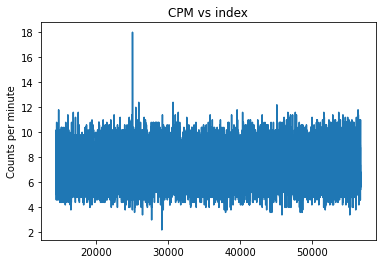

In [20]:
plt.plot(norra_cpm_month['cpm'])
plt.ylabel('Counts per minute')
plt.title("CPM vs index")
plt.show()

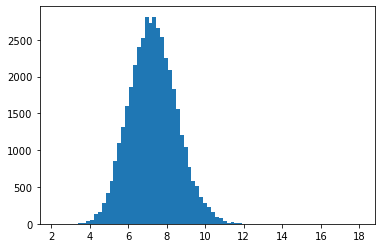

In [31]:
plt.hist(norra_cpm_month['cpm'], bins=78)
plt.show()

### 3.b. Re-import the data used for the lab activity (1pt)

In [32]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof.csv"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

s=requests.get(url,headers=header).text

etch_data = pd.read_csv(io.StringIO(s))

etch_cpm_data = etch_data.loc[:,"deviceTime_local":"cpm"]
time_mask = etch_cpm_data['deviceTime_local'] > '2019-08-05 00:00:00-0700'
etch_cpm_month = etch_cpm_data[time_mask]
time_mask = etch_cpm_month['deviceTime_local'] < '2020-01-01 00:00:00-0700'
etch_cpm_month = etch_cpm_month[time_mask]

### 3.c. Plot data from these two locations together, including labels (3pts)
__NOTE:__ Either, or both, of the below graphical comparisons is acceptable because I didn't specify.

__NOTE:__ I also did not explicitely say to include a legend, but that is part of labeling a graph with two sets of data, so this is 1pt.

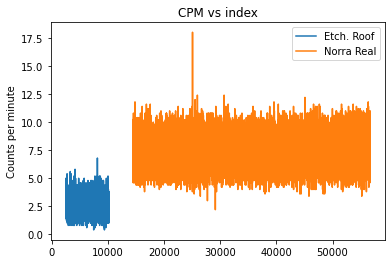

In [34]:
plt.plot(etch_cpm_month['cpm'], label = "Etch. Roof")
plt.plot(norra_cpm_month['cpm'], label="Norra Real")
plt.ylabel('Counts per minute')
plt.title("CPM vs index")
plt.legend()
plt.show()

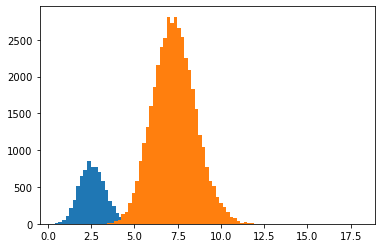

In [38]:
plt.hist(etch_cpm_month['cpm'], bins=31, label="Etch. Roof")
plt.hist(norra_cpm_month['cpm'], bins=78, label="Norra Real")
plt.show()

### 3.d. What is the mean CPM for each location? Do you think these are significantly different? Why might the radiation levels in these locations differ? (2pts)

In [39]:
etch_mean = np.mean(etch_cpm_month['cpm'])
norra_mean = np.mean(norra_cpm_month['cpm'])
print("The mean for the Etcheverry location =", etch_mean)
print("The mean for the Norra Real Gymnasium =", norra_mean)

The mean for the Etcheverry location = 2.6304739522130824
The mean for the Norra Real Gymnasium = 7.332273728592747


These look pretty different in the graph, there's no overlap, and the means are nto close. So it looks like they're significantly different. I am only looking for a qualitative assessment here. We will discuss how to be quantitative once we have the statistics background needed.

These differ because of the composition of the ground in the areas where these detectors sit. We will discuss this more in future lectures.